# CLUSTERING

Pada dataset ini akan dilakukan clustering dengan menggunakan metode K-Means, Hierarchical Clustering, dan DBSCAN untuk mengkategorisasi 205 mobil pada dataset tersebut.

### Import Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Merge Table

In [2]:
df_losses = pd.read_csv('automobile-losses.csv')
df_risk = pd.read_csv('automobile-risk.csv')
df_spec = pd.read_csv('automobile-spec.csv')

df_spec.shape, df_losses.shape, df_risk.shape

((205, 25), (205, 2), (205, 2))

In [4]:
data = pd.merge(df_spec, df_losses, how='left', on='ID')
data = pd.merge(df_merge, df_risk, how='left', on='ID')
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling_x,symboling_y
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 28 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

### Choose the variable to find cluster 

In [49]:
data = data[['curb-weight', 'price']]
data.head()

,curb-weight,price
0,2548,13495.0
1,2548,16500.0
2,2823,16500.0
3,2337,13950.0
4,2824,17450.0


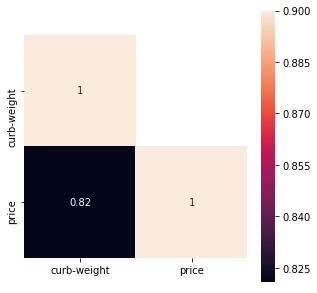

In [53]:
corr = data.corr(method = 'pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(5,5)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

### Check Missing Value and Fill it

In [7]:
data.isnull().sum()

curb-weight    0
price          4
dtype: int64

In [8]:
data['price'] = data['price'].fillna(data['price'].mean())

In [9]:
data.isnull().sum()

curb-weight    0
price          0
dtype: int64

In [10]:
data.corr()

,curb-weight,price
curb-weight,1.000000,0.820825
price,0.820825,1.000000


In [12]:
X = np.asarray(data)

### To see the characteristic from data

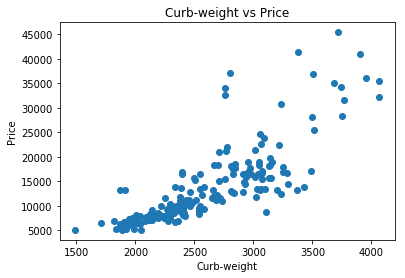

In [13]:
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Curb-weight")
plt.ylabel("Price")
plt.title("Curb-weight vs Price")
plt.show()

# K-Means

In [14]:
from sklearn.cluster import KMeans

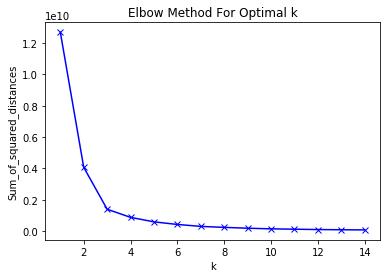

In [15]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Find the best K from silhouette score

In [18]:
range_n_clusters = [2, 3, 4]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X, labels)
    print(silhouette_avg)

0.7193482196378403
0.651006823512326
0.5903845085836701


### Activation K-Means 

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Print centroid value

In [20]:
print(kmeans.cluster_centers_)

[[ 2445.15       10793.51954118]
 [ 3350.56       30585.12      ]]


In [21]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]


### Print the Result

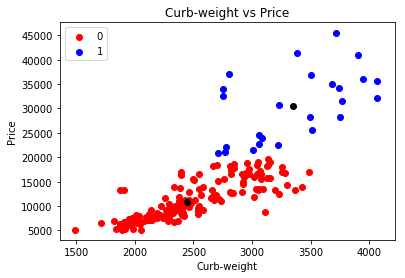

In [22]:
x = X[:,0]
x1 = X[:,1]
group = kmeans.labels_
color = ['red', 'blue']
fig, ax = plt.subplots()
for g in set (kmeans.labels_):
    xa = [x[j] for j in range (len(x)) if group[j]==g] 
    xb = [x1[j] for j in range (len(x1)) if group[j]==g]
    ax.scatter(xa, xb, c=color[g], label=g)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
ax.legend()
plt.xlabel("Curb-weight")
plt.ylabel("Price")
plt.title("Curb-weight vs Price")
plt.show()

### Input result value into variable

In [24]:
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

### Create similarity matrix

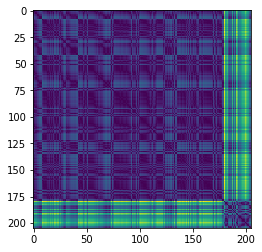

In [25]:
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

# Hierarchical Cluster

In [26]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### Create Dedogram with Ward method

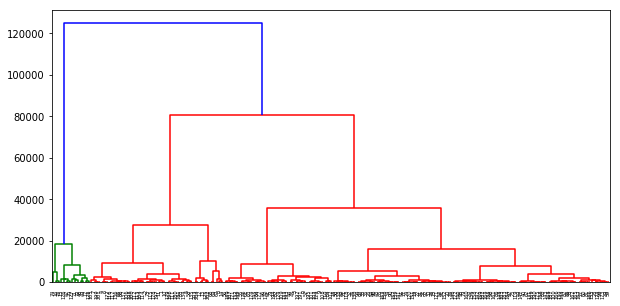

In [31]:
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

### Fitting hierarchical clustering 

In [29]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

### Plot the data after hierarchical clustering

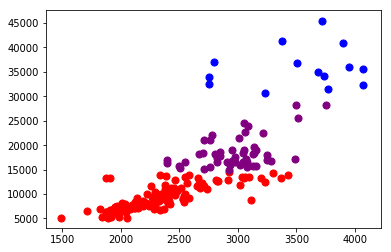

In [47]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='purple')
x = X[:,0]
x1 = X[:,1]
x2 = X[:,1]

# DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [34]:
dbscan = DBSCAN(eps=5000, min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=5000, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

### Print the result of DBSCAN

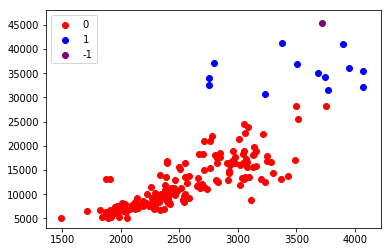

In [37]:
x = X[:,0]
x1 = X[:,1]
group = dbscan.labels_
color = ['red', 'blue', 'purple']
fig, ax = plt.subplots()
for g in set (dbscan.labels_):
    xa = [x[j] for j in range (len(x)) if group[j]==g] 
    xb = [x1[j] for j in range (len(x1)) if group[j]==g]
    ax.scatter(xa, xb, c=color[g], label=g)
ax.legend()
plt.show()

# METHOD RESULT

In [44]:
data['K-Means'] = pd.DataFrame(kmeans.labels_)
data['Hierarchical'] = pd.DataFrame(model.labels_)
data['DBSCAN'] = pd.DataFrame(dbscan.labels_)
data.head()

,curb-weight,price,K-Means,Hierarchical,DBSCAN
0,2548,13495.0,0,0,0
1,2548,16500.0,0,2,0
2,2823,16500.0,0,2,0
3,2337,13950.0,0,0,0
4,2824,17450.0,0,2,0


## Summary

Clustering yang digunakan ada tiga, yaitu : K-Means, Hierarchical dan DBSCAN. Atribut yang digunakan adalah dua variabel numerik, yaitu adalah Curb-weight dan Price. Curb-weight merupakan total massa kendaraan dengan peralatan standar dan semua perlengkapan operasional yang diperlukan. Pada analisa ini ingin mengetahui clustering dati curb-weight dan price, karena korelasi antar kedua variabel tersebut cukup besar.
<br>
<br>
Berdasarkan tiga metode clustering yang telah digunakan, dapat diketahui bahwa terdapat beberapa perbedaan clustering yang dihasilkan. Menurut saya, menggunakan metode Hierarchical pada kedua variabel tersebut lebih baik, karena pada metode Hierarchical terdapat similarity matrix yang memuat tingkat kemiripan antar data yang dikelompokkan.
<br>
<br>
Pada tiga metode clustering yang telah digunakan, terdapat beberapa perbedaan pada masing-masing metode, yaitu :
<br>
**K-Means** : Pada K-Means, awalnya akan dicari nilai K yang optimal untuk menentukan jumlah cluster. Dari analisa yang telah dilakukan, dapat diketahui berdasarkan Scree Plot dan Silhouette Score nilai K yang optimal adalah dua.
<br>
**Hierarchical** : Pada Hierarchical, untuk mempermudah pengembangan dendogram digunakan similarity matrix untuk melihat tingkat kemiripan antar data yang dikelompokkan. Tingkat kemiripan bisa dihitung dengan berbagai macam cara seperti dengan Euclidean Distance. Sehingga jumlah cluster ditentukan berdasarkan tingkat kemiripannya.
<br>
**DBSCAN** : Pada DBSCAN, dapat diketahui bahwa terdapat dua cluster yang terbentuk. Akan tetapi, pada metode ini terdapat satu variabel yang dinyatakan noise. Variabel tersebut terjadi karena data tersebut berada jauh dibandingkan dengan pasangan data lainnya. 